In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree, ensemble
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import KFold
from collections import defaultdict
import pprint

In [3]:
# Assignment Constants
RANDOM_STATE = 10
FIGSIZE = (12,8)
#### Use the following line before plt.plot(....) to increase the plot size ####
# plt.figure(figsize=FIGSIZE)

## Question 1 
Use the breast cancer data set from Homework 0 to create a training set. Recall that the
label is 0 if the patient’s data indicates a malignant cancer and 1 otherwise. Compute the
base rate of malignant cancer occurrence over the entire data set. In other words, what would
be your best guess for the probability of malignant cancer of a single example using only the
labels in the training set? This question is very simple, so try not to overthink it.

In [4]:
# Load the breast cancer dataset
cancer = load_breast_cancer()

# Extract the labels (target) from the dataset
labels = cancer.target

# Compute the base rate of malignant cancer occurrence
malignant_rate = 1 - np.mean(labels)

print(f"The base rate of malignant cancer occurrence is: {malignant_rate:.4f}")
print(f"Therefore, the probability of malignant cancer for a single example is: {malignant_rate:.4f}")


The base rate of malignant cancer occurrence is: 0.3726
Therefore, the probability of malignant cancer for a single example is: 0.3726


## 2
The goal is to build a decision tree that, based on the other features in the set, predicts
whether or not a patient has malignant cancer. So this is a classification problem. Using
`tree.DecisionTreeClassifier` and other functions in the scikit-learn library, one can build
a decision tree and calculate both its training accuracy when fitted to the entire data set as
well as its accuracy using 10-fold cross validation (which gives a better idea of true accuracy).
In this question you will need to complete two sub-components:
### (a) 
(a) Make a plot visualizing the performance of a `tree.DecisionTreeClassifier` as you
search for an optimal `max_depth` parameter. Vary the depth of your decision tree using
max depth = 1,2,. . . ,10 and record the results from the following evaluation procedures
for each setting:
* The accuracy when training and testing on the full dataset.
* 10-fold cross-validated accuracy.

Plot the results of both evaluation procedures on the same plot with evaluation scores on
the y-axis and max depth values on the x-axis. Use 10 as your random seed/state for the
decision tree and the cross-validation. Use a legend to label both evaluation procedures.


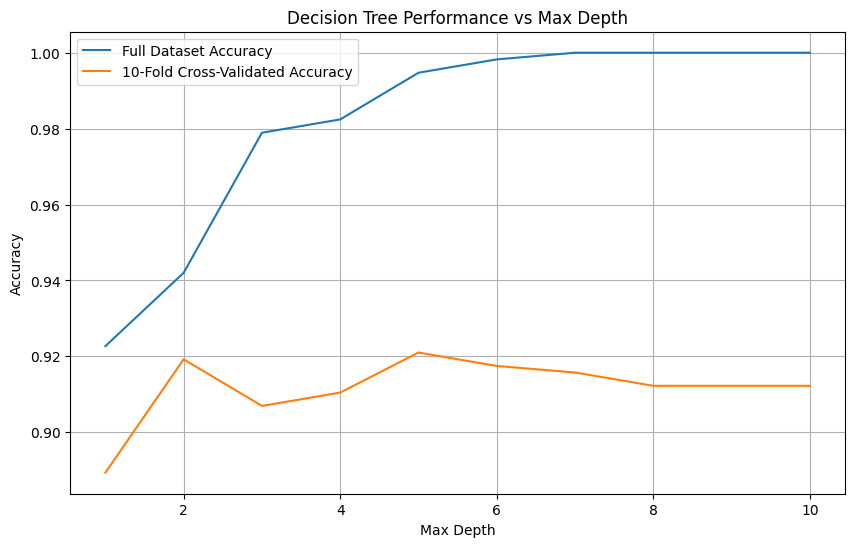

In [7]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Extract features and target
X = cancer.data
y = cancer.target

# Initialize lists to store accuracies
full_dataset_accuracies = []
cross_val_accuracies = []

# Vary max_depth from 1 to 10
max_depths = range(1, 11)

for depth in max_depths:
    # Create and train the decision tree
    clf = DecisionTreeClassifier(max_depth=depth, random_state=10)
    clf.fit(X, y)
    
    # Calculate full dataset accuracy
    full_dataset_accuracy = clf.score(X, y)
    full_dataset_accuracies.append(full_dataset_accuracy)
    
    # Calculate 10-fold cross-validated accuracy
    cv_scores = cross_val_score(clf, X, y, cv=10)
    cross_val_accuracies.append(np.mean(cv_scores))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_depths, full_dataset_accuracies, label='Full Dataset Accuracy')
plt.plot(max_depths, cross_val_accuracies, label='10-Fold Cross-Validated Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Performance vs Max Depth')
plt.legend()
plt.grid(True)
plt.show()


### (b) 
Answer the questions below based on the results of 2a. Write your answers in the
corresponding field in the markdown cell that is present in the HW1 template notebook.
Do this by double clicking the markdown cell and writing your answer directly in the
cell. Pressing enter will re-render the markdown.

#### (i.)
What setting of `max_depth` gave the best accuracy w.r.t. the **full-dataset** accuracy?
If more than one setting equaled the best accuracy, list each of the best settings.

**Based on the plot, the setting of `max_depth` that gave the best accuracy with respect to the full-dataset accuracy is 10. The blue line representing the full dataset accuracy reaches its highest point at a max depth of 10.**

#### (ii.)
What setting of `max_depth`  gave the best accuracy w.r.t. the **cross-
validated** accuracy? If more than one setting equaled the best accuracy, list each of the best settings.

**According to the plot, the setting of `max_depth` that gave the best accuracy with respect to the cross-validated accuracy is 5. The orange line representing the 10-fold cross-validated accuracy reaches its peak at a max depth of 5 and then plateaus.**


## 3\. 
This question explores random forest classifiers by using scikit-learn’s `ensemble.RandomForestClassifier`.
You will make two plots and answer questions about them.

### (a) 
For the first plot, use a `ensemble.RandomForestClassifier` and the best depth you
found 2(b)ii as `max_depth`. We will now find the optimal setting of a second parameter,
n estimators. Vary the number of trees in the forest via the parameter `n_estimators`
and plot its 10-fold cross-validated accuracy (use `n_estimators` = 1, 2, . . . , 20). Again,
use 10 as your random seed for your classifier and cross-validation.

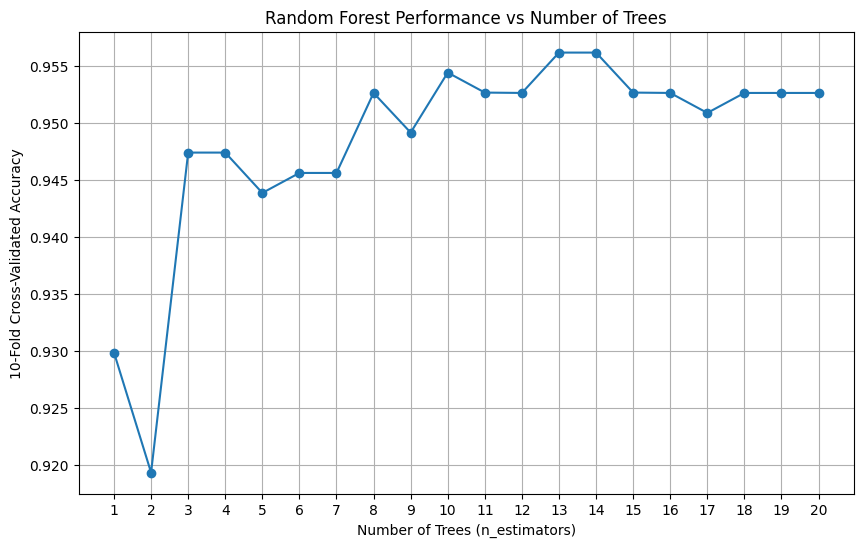

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Best max_depth from 2(b)ii
best_max_depth = 5

# Range of n_estimators to test
n_estimators_range = range(1, 21)

# List to store cross-validated accuracies
cv_accuracies = []

# Set random seed
random_seed = 10

# Iterate through different n_estimators
for n_estimators in n_estimators_range:
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, max_depth=best_max_depth, random_state=random_seed)
    scores = cross_val_score(rf_classifier, X, y, cv=10, scoring='accuracy')
    cv_accuracies.append(np.mean(scores))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, cv_accuracies, marker='o')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('10-Fold Cross-Validated Accuracy')
plt.title('Random Forest Performance vs Number of Trees')
plt.grid(True)
plt.xticks(n_estimators_range)  # Set x-axis ticks to whole numbers
plt.show()


### (b) 
Do you see an improvement using random forests versus using a single tree? (Note: use
the `n_estimators`=1 result as the result for a single tree.)

**Yes, there is a clear improvement using random forests versus using a single tree. From the graph, we can see that when n_estimators=1 (equivalent to a single tree), the accuracy is around 0.92. As the number of trees increases, the accuracy quickly improves, reaching above 0.95 for most values of n_estimators greater than 1.**

### (c) 
What setting of `n_estimators` gave the best accuracy w.r.t. the cross-validated ac-
curacy?

**Based on the graph, the setting of n_estimators that gave the best accuracy with respect to the cross-validated accuracy appears to be 14. The plot shows a peak in accuracy at this point, slightly higher than the surrounding values.**

### (d) 
For the second plot, again use a `ensemble.RandomForestClassifier`, but this time
you will fix the `n_estimators` parameter and again attempt to find the optimal setting
of a `max_depth`. Use your answer to 3c as the setting for `n_estimators` and follow the
procedure from 2a to find the best setting for max depth. This time, only plot the results
from cross-validation and not the full set, but the plot should be the same structure
as in 2a otherwise (use `max_depth` = 1,2,. . . ,10). Again, use 10 as your random seed.

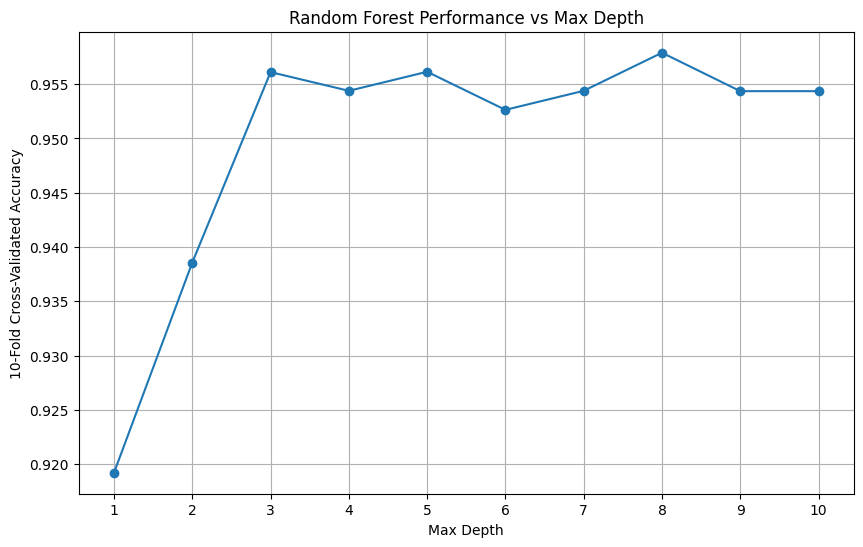

In [9]:
# Set the optimal n_estimators from part 3c
optimal_n_estimators = 14

# Set the range for max_depth
max_depth_range = range(1, 11)

# List to store cross-validated accuracies
cv_accuracies = []

# Set random seed
random_seed = 10

# Iterate through different max_depth values
for max_depth in max_depth_range:
    rf_classifier = RandomForestClassifier(n_estimators=optimal_n_estimators, max_depth=max_depth, random_state=random_seed)
    scores = cross_val_score(rf_classifier, X, y, cv=10, scoring='accuracy')
    cv_accuracies.append(np.mean(scores))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, cv_accuracies, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('10-Fold Cross-Validated Accuracy')
plt.title('Random Forest Performance vs Max Depth')
plt.xticks(max_depth_range)
plt.grid(True)
plt.show()


### (e) 
In the plot in 3d, is the optimal setting of `max_depth` the same as in 2(b)ii? If not, what
is the new optimal setting of `max_depth`?

**Based on the plot in 3d, the optimal setting of max_depth is not the same as in 2(b)ii. In 2(b)ii, the optimal max_depth was 5. However, in this new plot for the Random Forest classifier, the optimal max_depth appears to be 8.
The new optimal setting of max_depth is 8, as it shows the highest 10-fold cross-validated accuracy on the graph.
To answer the question directly:
No, the optimal setting of max_depth is not the same as in 2(b)ii. The new optimal setting of max_depth is 8.** 

## 4\. 
For this last question, we will explore the dependability of our estimates. 
### (a) 
Make a plot using the following procedure:
#### i. 
Using random state values from 0, 1, · · · , 99 calculate the 10-fold cross-validation
accuracy of different `tree.DecisionTreeClassifiers` with max depth settings from
1, 2, · · · , 10.
As before, you should use the same random state value for your classifier and cross-validation.
#### ii. 
Then record the best max depth settings for each random state. Be sure to check whether multiple settings
achieve the best accuracy.


Plot the counts for the best max depth settings as a bar chart with the max depth settings on the x-axis and the 'best parameter counts' on the y-axis (number of times that parameter was selected as the best max depth setting).

*Note*: this calculation might take some time. For debugging, try a smaller range of
random states.

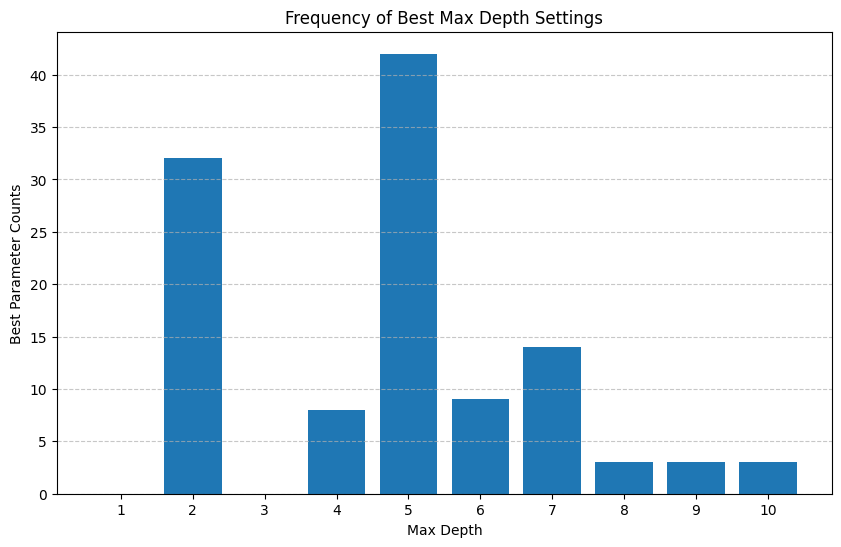

In [13]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Define the range of max_depth and random states
max_depth_range = range(1, 11)
random_states = range(100)

# Dictionary to store the count of best max_depth settings
best_max_depth_counts = {depth: 0 for depth in max_depth_range}

for random_state in random_states:
    best_accuracy = 0
    best_depths = []
    
    for max_depth in max_depth_range:
        clf = DecisionTreeClassifier(max_depth=max_depth, random_state=random_state)
        scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
        mean_accuracy = np.mean(scores)
        
        if mean_accuracy > best_accuracy:
            best_accuracy = mean_accuracy
            best_depths = [max_depth]
        elif mean_accuracy == best_accuracy:
            best_depths.append(max_depth)
    
    # Increment the count for each best max_depth
    for depth in best_depths:
        best_max_depth_counts[depth] += 1

# Prepare data for plotting
depths = list(best_max_depth_counts.keys())
counts = list(best_max_depth_counts.values())

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(depths, counts)
plt.xlabel('Max Depth')
plt.ylabel('Best Parameter Counts')
plt.title('Frequency of Best Max Depth Settings')
plt.xticks(depths)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### (b) 
What are the top two most frequent parameter settings?

Based on the bar plot shown in the image, the top two most frequent parameter settings for max_depth are: 
1. Max Depth = 5: This has the highest bar in the graph, indicating it was the most frequent best parameter setting.
2. Max Depth = 2: This has the second-highest bar in the graph, making it the second most frequent best parameter setting.**

These two max_depth values (5 and 2) were found to be the optimal choices most often across the different random states tested in the cross-validation process.